In [1]:
install.packages("fpp3")
install.packages("urca")
library(fpp3)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘quadprog’, ‘warp’, ‘BH’, ‘distributional’, ‘progressr’, ‘ggdist’, ‘slider’, ‘anytime’, ‘fable’, ‘fabletools’, ‘feasts’, ‘tsibble’, ‘tsibbledata’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr

── Attaching packages ──────────────────────────────────────────── fpp3 1.0.0 ──

✔ tibble      3.2.1     ✔ tsibble     1.1.5
✔ dplyr       1.1.4     ✔ tsibbledata 0.4.1
✔ tidyr       1.3.1     ✔ feasts      0.3.2
✔ lubridate   1.9.3     ✔ fable       0.3.4
✔ ggplot2     3.5.1     ✔ fabletools  0.4.2

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interv

### Read data

In [2]:
df <- read.csv('data.csv')
df$Timestamp <- as.POSIXct(df$Timestamp,format='%Y-%m-%d %H:%M:%S')
df <- as_tsibble(df,index=Timestamp)

In [6]:
df |> colnames()

[1] "Month"                                          
 [2] "Hour"                                           
 [3] "DayType"                                        
 [4] "Workday"                                        
 [5] "DaylightSavings"                                
 [6] "Load"                                           
 [7] "Load_1"                                         
 [8] "Load_2"                                         
 [9] "Load_3"                                         
[10] "Load_4"                                         
[11] "Load_5"                                         
[12] "Load_6"                                         
[13] "Load_7"                                         
[14] "Load_8"                                         
[15] "Load_9"                                         
[16] "SolarGen"                                       
[17] "NetLoad"                                        
[18] "NetLoadLag"                                     
[19] "NetLoadLag2"                                    
[20] "NetLoadLag3"                                    
[21] "NetLoadLag24"                                   
[22] "NetLoadMax24"                                   
[23] "NetLoadMin24"                                   
[24] "Price"                                          
[25] "Outdoor.Drybulb.Temperature..C."                
[26] "Outdoor.Relative.Humidity...."                  
[27] "Diffuse.Solar.Radiation..W.m2."                 
[28] "Direct.Solar.Radiation..W.m2."                  
[29] "X6h.Prediction.Outdoor.Drybulb.Temperature..C." 
[30] "X12h.Prediction.Outdoor.Drybulb.Temperature..C."
[31] "X24h.Prediction.Outdoor.Drybulb.Temperature..C."
[32] "X6h.Prediction.Outdoor.Relative.Humidity...."   
[33] "X12h.Prediction.Outdoor.Relative.Humidity...."  
[34] "X24h.Prediction.Outdoor.Relative.Humidity...."  
[35] "X6h.Prediction.Diffuse.Solar.Radiation..W.m2."  
[36] "X12h.Prediction.Diffuse.Solar.Radiation..W.m2." 
[37] "X24h.Prediction.Diffuse.Solar.Radiation..W.m2." 
[38] "X6h.Prediction.Direct.Solar.Radiation..W.m2."   
[39] "X12h.Prediction.Direct.Solar.Radiation..W.m2."  
[40] "X24h.Prediction.Direct.Solar.Radiation..W.m2."  
[41] "Radiation..W.m2."                               
[42] "X6h.Prediction.Radiation..W.m2."                
[43] "X12h.Prediction.Radiation..W.m2."               
[44] "X24h.Prediction.Radiation..W.m2."               
[45] "TempLag"                                        
[46] "TempLag2"                                       
[47] "TempLag3"                                       
[48] "TempLag24"                                      
[49] "TempMean24"                                     
[50] "TempMean1W"                                     
[51] "Timestamp"

In [3]:
df <- df |> rename(Temp = Outdoor.Drybulb.Temperature..C.,
                    TempPred6h = X6h.Prediction.Outdoor.Drybulb.Temperature..C.,
                    TempPred12h = X12h.Prediction.Outdoor.Drybulb.Temperature..C.,
                    TempPred24h = X12h.Prediction.Outdoor.Drybulb.Temperature..C.,
                    RadDifPred6h = X6h.Prediction.Diffuse.Solar.Radiation..W.m2.,
                    RadDifPred12h = X12h.Prediction.Diffuse.Solar.Radiation..W.m2.,
                    RadDifPred24h = X24h.Prediction.Diffuse.Solar.Radiation..W.m2.,
                    RadDifPred24h = X24h.Prediction.Diffuse.Solar.Radiation..W.m2.,
                    RadDirPred6h = X6h.Prediction.Direct.Solar.Radiation..W.m2.,
                    Rad = Radiation..W.m2.,
                    RadPred6h = X6h.Prediction.Radiation..W.m2.,
                    RadPred12h = X12h.Prediction.Radiation..W.m2.,
                    RadPred24h = X24h.Prediction.Radiation..W.m2.,
                    Hum = Outdoor.Relative.Humidity....,
                    HumPred6h = X6h.Prediction.Outdoor.Relative.Humidity....,
                    HumPred12h = X12h.Prediction.Outdoor.Relative.Humidity....,
                    HumPred24h = X24h.Prediction.Outdoor.Relative.Humidity....,
                    Solar = SolarGen)
df$DayType <- as.factor(df$DayType)
df$Hour <- as.factor(df$Hour)
df$Month <- as.factor(df$Month)
df$Holiday <- (df$DayType == "Holiday")
df$Sun <- (df$DayType == "Sun")
df$Sat <- (df$DayType == "Sat")

train <- df[1:(24*365*2),]
val <- df[(24*365*2+1):(24*365*3),]
test <- df[(24*365*3+1):nrow(df),]

# Plots / tests

In [ ]:
install.packages("TSA")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘zoo’, ‘quantmod’, ‘leaps’, ‘locfit’, ‘tseries’




In [ ]:
library(TSA)
pdf('periodogram.pdf',6,6.3)
p <- periodogram(train$NetLoad, log='yes', cex.axis=1.2, cex.lab=1.3)
dev.off()
pspec <- as.data.frame(cbind(Freq=p$freq, Per=1/p$freq, Spec=p$spec))
pspec %>% arrange(desc(Spec))

png 
  2

Freq,Per,Spec
<dbl>,<dbl>,<dbl>
1.111111e-04,9000.00000,422725472
4.166667e-02,24.00000,344518183
4.155556e-02,24.06417,68833644
4.177778e-02,23.93617,65985058
1.666667e-04,6000.00000,14403315
8.333333e-02,12.00000,13240129
5.944444e-03,168.22430,12261232
2.222222e-04,4500.00000,10595799
4.444444e-04,2250.00000,6179200


In [ ]:
train |> features(NetLoad, unitroot_kpss)

kpss_stat,kpss_pvalue
<dbl>,<dbl>
7.414432,0.01


In [ ]:
train |> features(difference(NetLoad,24), unitroot_kpss)

kpss_stat,kpss_pvalue
<dbl>,<dbl>
0.02227288,0.1


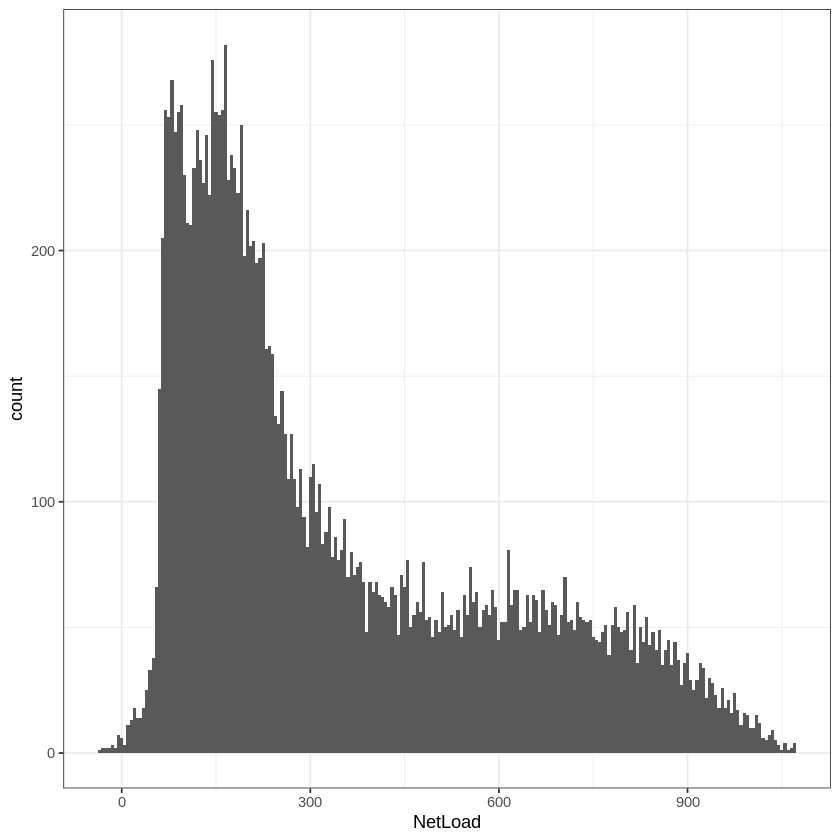

In [ ]:
ggplot(train, aes(x = NetLoad)) +
  geom_histogram(alpha = 1, binwidth=5)+
  theme_bw()

Optymalna λ dla transformacji Boxa-Coxa

In [ ]:
train |>
  features(NetLoad, features = guerrero)

lambda_guerrero
<dbl>
-0.05688931


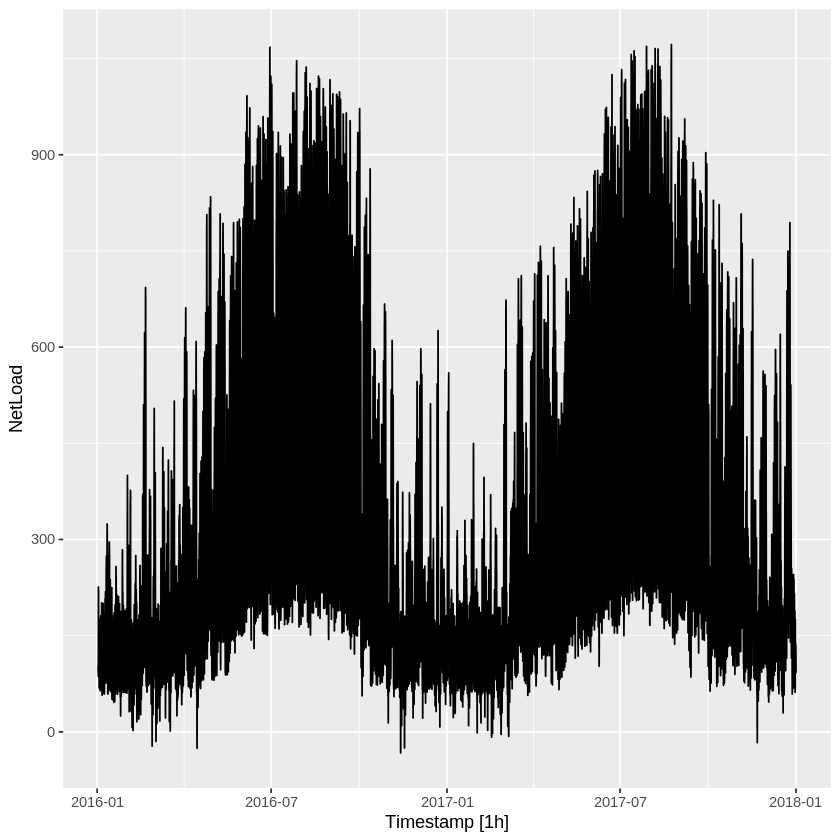

In [ ]:
train |>
  autoplot(NetLoad)

In [ ]:
train |>
  autoplot(box_cox(NetLoad, 1.09232))

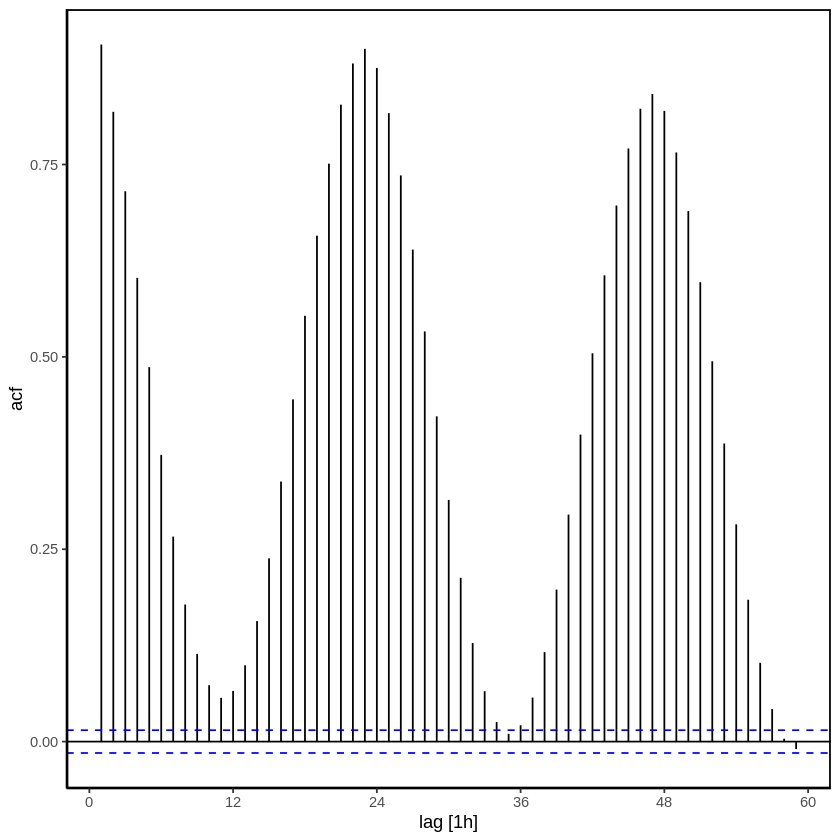

In [ ]:
train |>
  ACF(NetLoad, lag_max=60) |>
  autoplot() + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), panel.border = element_rect(colour = "black", fill=NA, linewidth=1), axis.line = element_line(colour = "black")) + labs(xlab="lag [h]")
ggsave('ACF.pdf',width=5.8,height=3)

# Fit models: y = Load


SNAIVE
<model>
<SNAIVE>


.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SNAIVE,Training,0.2289538,118.236,77.65323,-4.325936,21.79406,1,1,0.9038472


Warning message:
“Removed 24 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 24 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 24 rows containing non-finite outside the scale range (`stat_bin()`).”


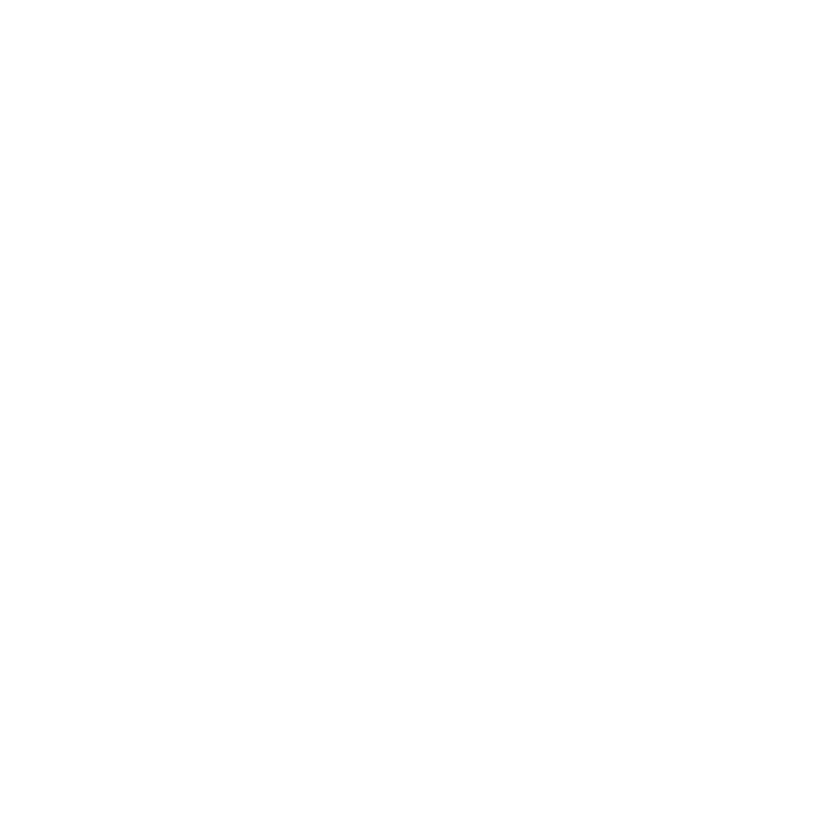

In [ ]:
model <- train |>
  model(SNAIVE = SNAIVE(Load ~ lag("day")))
saveRDS(model, file="SNAIVE.rds")
model
model |> refit(val) |> accuracy()
model |> gg_tsresiduals()

Wprowadzenie sezonowości w formie harmonik poprawiło MAPE, RMSE na zbiorze walidacyjnym oraz skróciło czas estymacji.

In [ ]:
model <- train |>
  model(SAR = ARIMA(log(Load) ~ PDQ(period=24)))
saveRDS(model, file="SAR.rds")
model
model |> refit(val) |> accuracy()
model |> gg_tsresiduals()

SART
<model>
"<LM w/ ARIMA(1,0,3)(2,1,0)[24] errors>"


.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SART,Training,-0.02414076,41.79029,30.14764,-0.846541,10.10778,0.3882342,0.3534479,-0.001523527


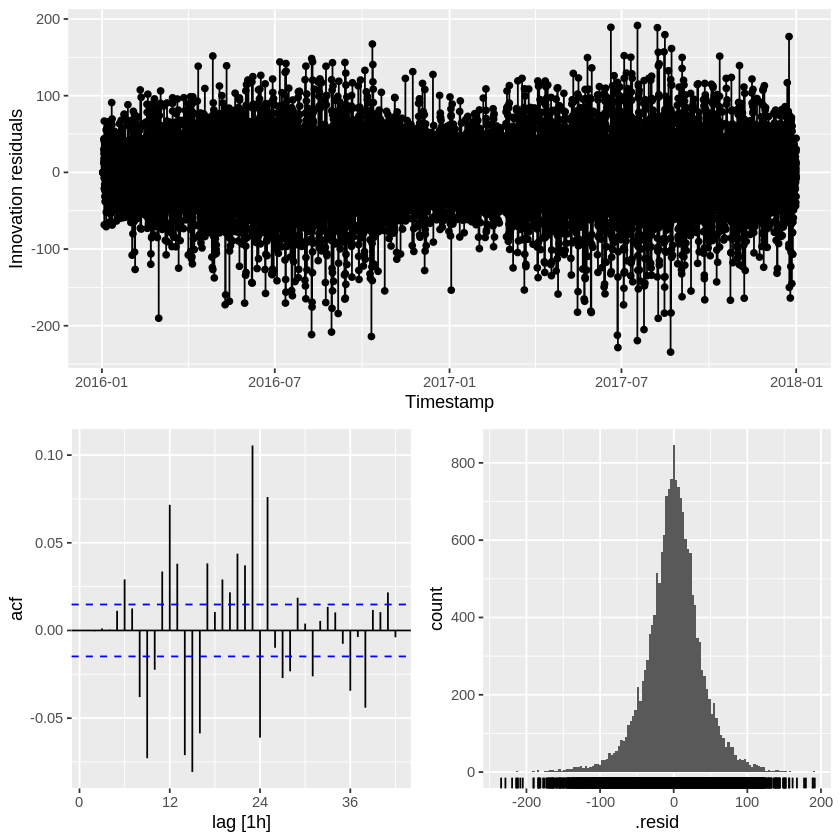

In [ ]:
model <- train |>
  model(SART = ARIMA(log(Load) ~ pdq(1,0,3) + PDQ(2,1,0,period=24) + TempPred6h))
saveRDS(model, file="SART.rds")
model
model |> refit(val) |> accuracy()
model |> gg_tsresiduals()

ART1S
<model>
"<LM w/ ARIMA(1,0,3) errors>"


.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ART1S,Training,4.875944,46.87193,33.53091,-0.8280719,9.885515,0.4318032,0.3964268,0.1820358


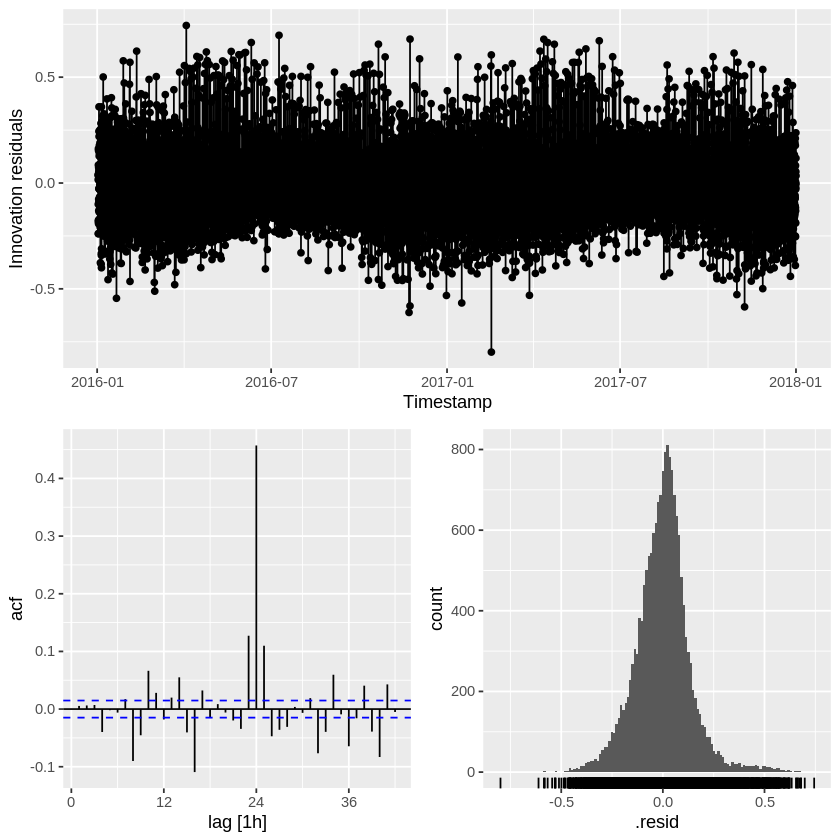

In [ ]:
model <- train |>
  model(ART1S = ARIMA(log(Load) ~ pdq(1,0,3) + PDQ(0,0,0) + TempPred6h + fourier(period = "day", K =2)))
saveRDS(model, file="ART1S.rds")
model
model |> refit(val) |> accuracy()
model |> gg_tsresiduals()

In [ ]:
model <- train |>
  model(SART = ARIMA(log(Load) ~ pdq(1,0,3) + PDQ(2,1,0,period=24) + lag() + TempPred6h))
saveRDS(model, file="SART.rds")
model
model |> refit(val) |> accuracy()
model |> gg_tsresiduals()

In [ ]:
#readRDS('SART.rds')

In [ ]:
models

In [ ]:
options(repr.plot.width = 10, repr.plot.height =5)
models |>
  augment() |>
   autoplot(.innov) + theme_bw()
 ggsave('AR1ST_residuals.pdf',width = 8, height = 4)

In [ ]:
generated <- models |> refit(val) |> generate(test[1:24,],times=5,bootstrap=TRUE) #|> autoplot() #forecast(val[49:72,])

In [ ]:
tail(val) |>
  ggplot(aes(x = Timestamp)) +
  geom_line(aes(y = Load)) +
  geom_line(aes(y = .sim, colour = as.factor(.rep)), data = generated)+
  guides(colour = "none") +theme_bw()

# Fit models: y = NetLoad

### Seasonal Naive

"SNAIVE(NetLoad ~ lag(""day""))"
<model>
<SNAIVE>


.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"SNAIVE(NetLoad ~ lag(""day""))",Training,0.6911884,115.6826,76.50134,-6.161189,29.38754,1,1,0.9056266


Warning message:
“Removed 24 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 24 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 24 rows containing non-finite outside the scale range (`stat_bin()`).”


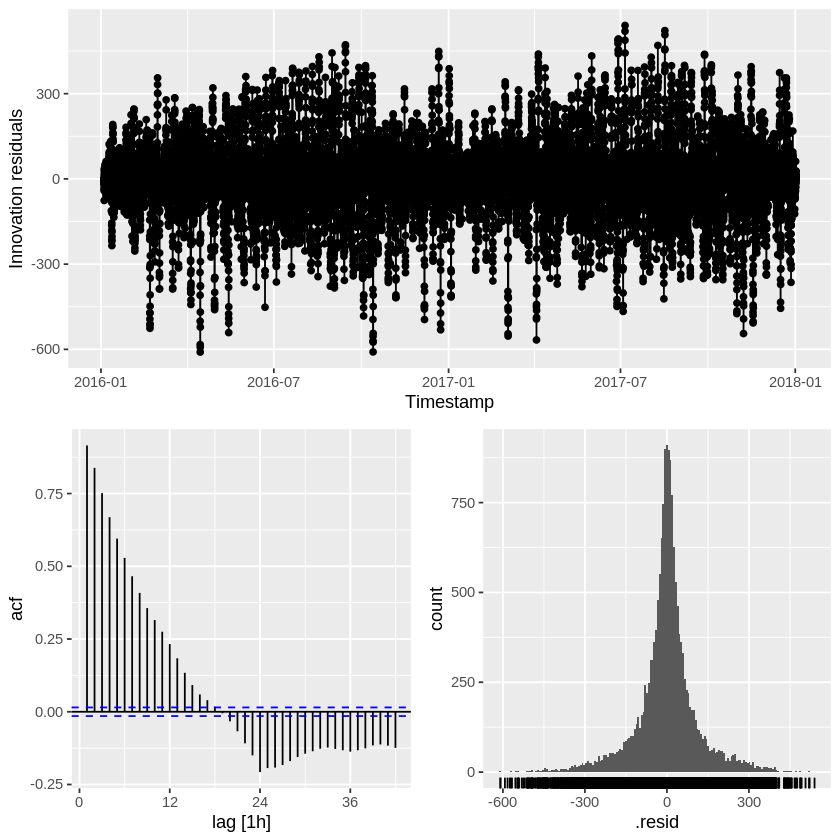

In [11]:
name <- "SNAIVE"
model <- train |>
  model(SNAIVE(NetLoad ~ lag("day")))
saveRDS(model, file=paste0(name,".rds"))
model
model |> refit(val) |> accuracy()
model |> gg_tsresiduals()

### SARIMA

ARIMA(NetLoad ~ PDQ(period = 24))
<model>
"<ARIMA(1,0,3)(2,1,0)[24]>"


.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ARIMA(NetLoad ~ PDQ(period = 24)),Training,0.06886083,42.9396,30.79776,-1.37795,12.50554,0.4025781,0.3711846,-0.004181091


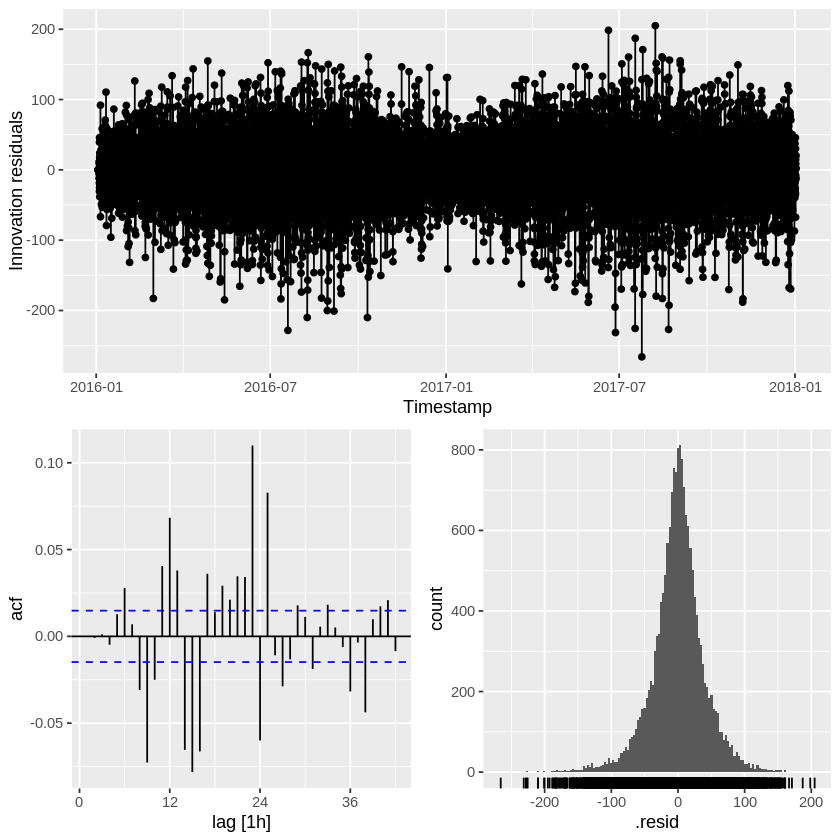

In [10]:
model <- train |>
  model(ARIMA(NetLoad ~ PDQ(period=24)))
saveRDS(model, file="SARIMA.rds")
model
model |> refit(val) |> accuracy()
model |> gg_tsresiduals()

"ARIMA(box_cox(NetLoad, 0.74) ~ PDQ(period = 24))"
<model>
"<ARIMA(1,0,3)(2,1,0)[24]>"


.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"ARIMA(box_cox(NetLoad, 0.74) ~ PDQ(period = 24))",Training,0.1721009,42.13538,30.17779,-1.197032,12.02038,0.3964641,0.3657438,-0.0001663109


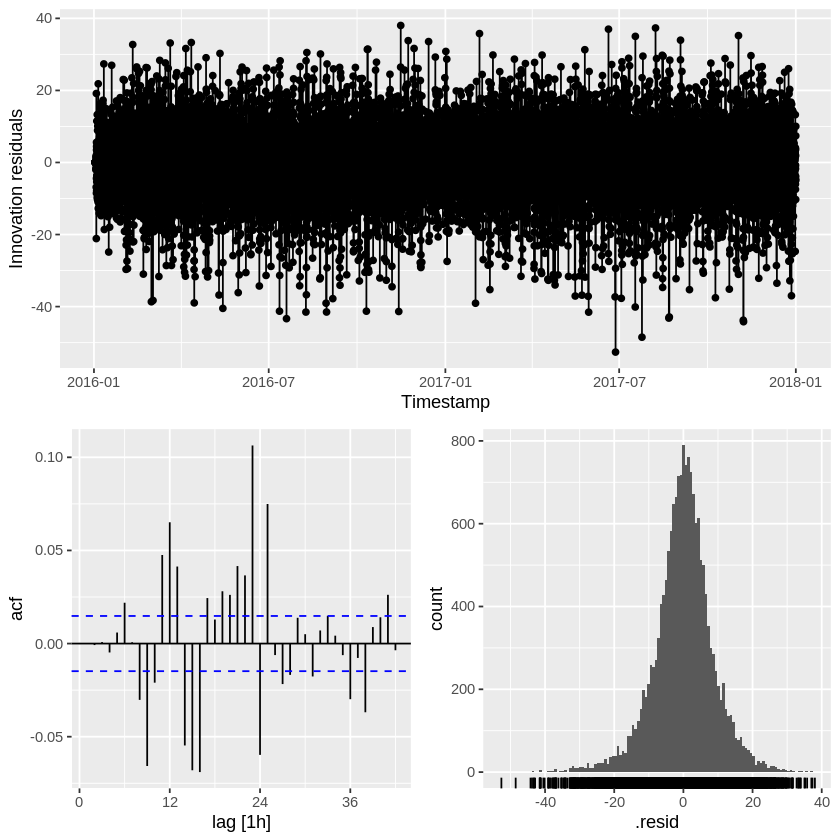

In [7]:
model <- train |>
  model(ARIMA(box_cox(NetLoad,0.74) ~ PDQ(period=24)))
saveRDS(model, file="SARIMA_BC.rds")
model
model |> refit(val) |> accuracy()
model |> gg_tsresiduals()

### ETS

ETS(NetLoad)
<model>
"<ETS(A,N,A)>"


.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ETS(NetLoad),Training,0.02839258,45.1727,33.05308,-1.197074,13.58001,0.4320588,0.3904883,0.3170477


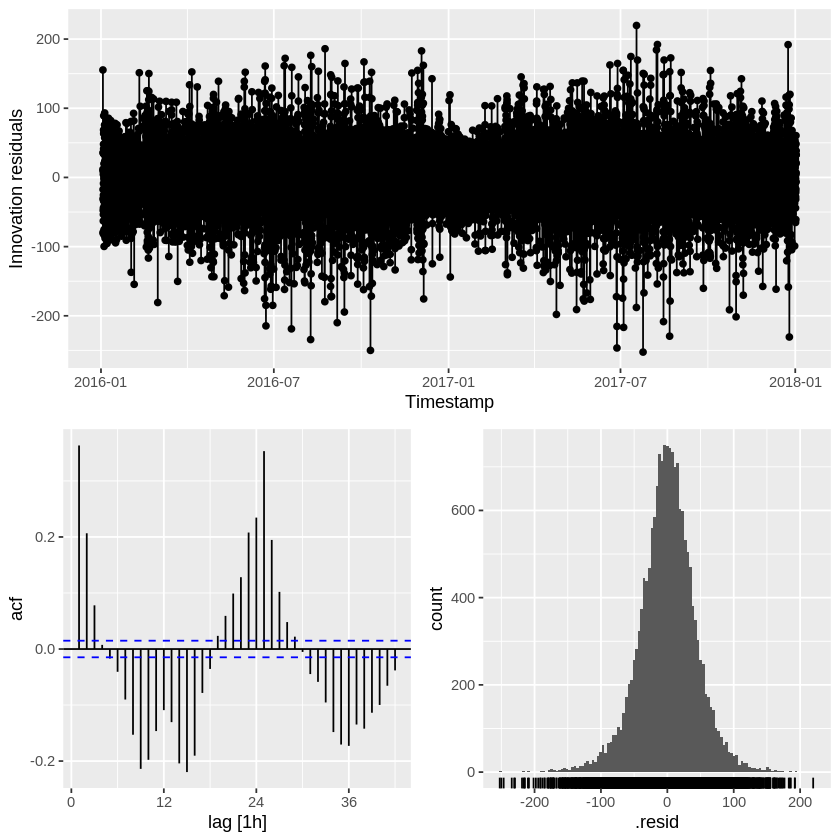

In [9]:
name <- "ETS"
model <- train |>
  model(ETS(NetLoad))
saveRDS(model, file=paste0(name,".rds"))
model
model |> refit(val) |> accuracy()
model |> gg_tsresiduals()

### Regression

model
<model>
<TSLM>


.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model,Training,0.4996483,25.97357,19.19526,-0.3566534,7.905479,0.250914,0.2245244,0.01023109


.model,lb_stat,lb_pvalue
<chr>,<dbl>,<dbl>
model,106.9293,0


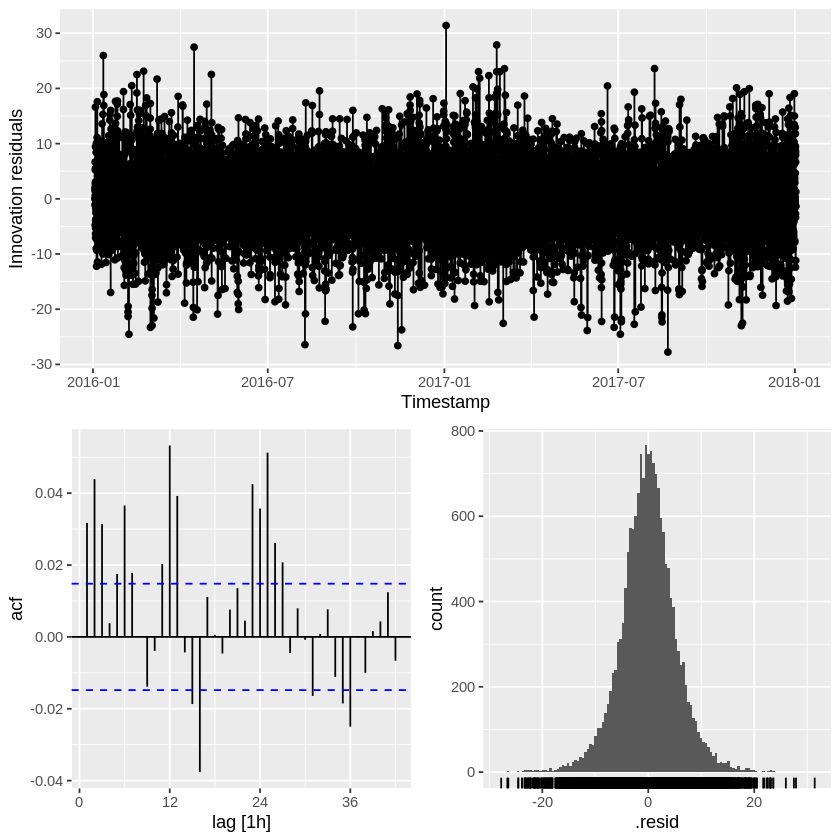

In [7]:
name <- "REG"
model <- train |>
  model(model = TSLM(box_cox(NetLoad,0.74) ~
                        #Hour  # hour of the day
                        fourier("day",K=3)
                       + DayType
                       + DayType*Hour
                       + fourier("year",K=5)
                       + fourier("year",K=5)*Hour
                      #  + fourier("year",K=5)*DayType  # excluded
                       + NetLoadLag
                       + NetLoadLag2
                       + NetLoadLag3
                        + NetLoadLag4
                      #  + NetLoadLag5
                      #  + NetLoadLag6
                       + NetLoadLag23
                       + NetLoadLag24
                       #+ NetLoadLag48  #excluded
                       + NetLoadMax24
                       + NetLoadMin24
                       + TempPred6h
                       + TempPred6h*Hour
                       + I(TempPred6h^2)
                       + I(TempPred6h^2)*Hour
                       + I(TempPred6h^3)
                       + I(TempPred6h^3)*Hour
                       + TempPred6h*fourier("year",K=5)
                       + I(TempPred6h^2)*fourier("year",K=5)
                       + I(TempPred6h^3)*fourier("year",K=5)
                       + TempMean24
                       + TempMean24*Hour
                       + I(TempMean24^2)
                       + I(TempMean24^2)*Hour
                      #  + TempMean24*fourier("year",K=3)  # excluded
                      #  + I(TempMean24^2)*fourier("year",K=3) # excluded
                      #  + I(TempMean24^3)*fourier("year",K=3) # excluded
                       + TempMean1W
                       + TempMean1W*Hour
                       + I(TempMean1W^2)
                       + I(TempMean1W^2)*Hour
                       + TempLag
                       + TempLag*Hour
                       + I(TempLag^2)
                       + I(TempLag^2)*Hour
                       + I(TempLag^3) # excluded
                       + I(TempLag^3)*Hour # excluded
                       + TempLag2
                       + TempLag2*Hour
                       + I(TempLag2^2)
                       + I(TempLag2^2)*Hour
                      #  + I(TempLag2^3) # excluded
                      #  + I(TempLag2^3)*Hour  # excluded
                       + TempLag3
                       + TempLag3*Hour
                       + I(TempLag3^2)
                       + I(TempLag3^2)*Hour
                       + TempLag24
                       + TempLag24*Hour
                       + I(TempLag24^2)
                       + I(TempLag24^2)*Hour
                       + pmax(TempPred6h,27)
                       + pmax(TempLag,27)
                       + pmax(TempLag2,27)
                       + RadPred6h
                       + I(RadPred6h^2)
                       #+ RadPred6h*TempPred6h # excluded
                      #  + I(RadPred6h^3) # excluded
                       + HumPred6h
                       + I(HumPred6h^2)
                       + HumPred6h*RadPred6h
                      ))
saveRDS(model, file=paste0(name,".rds"))
model
model |> refit(val) |> accuracy()
# model |> coef()
model |> gg_tsresiduals()
augment(model) |> features(.innov, ljung_box, lag=10)

### Regression with SARMA errors

Warning message:
“It looks like you're trying to fully specify your ARIMA model but have not said if a constant should be included.
You can include a constant using `ARIMA(y~1)` to the formula or exclude it by adding `ARIMA(y~0)`.”
Warning message:
“1 error encountered for name
[1] Could not find an appropriate ARIMA model.
This is likely because automatic selection does not select models with characteristic roots that may be numerically unstable.
For more details, refer to https://otexts.com/fpp3/arima-r.html#plotting-the-characteristic-roots
”


name
<model>
<NULL model>


.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
name,Training,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA


ERROR: Error in na.contiguous.default(as.ts(x)): all times contain an NA


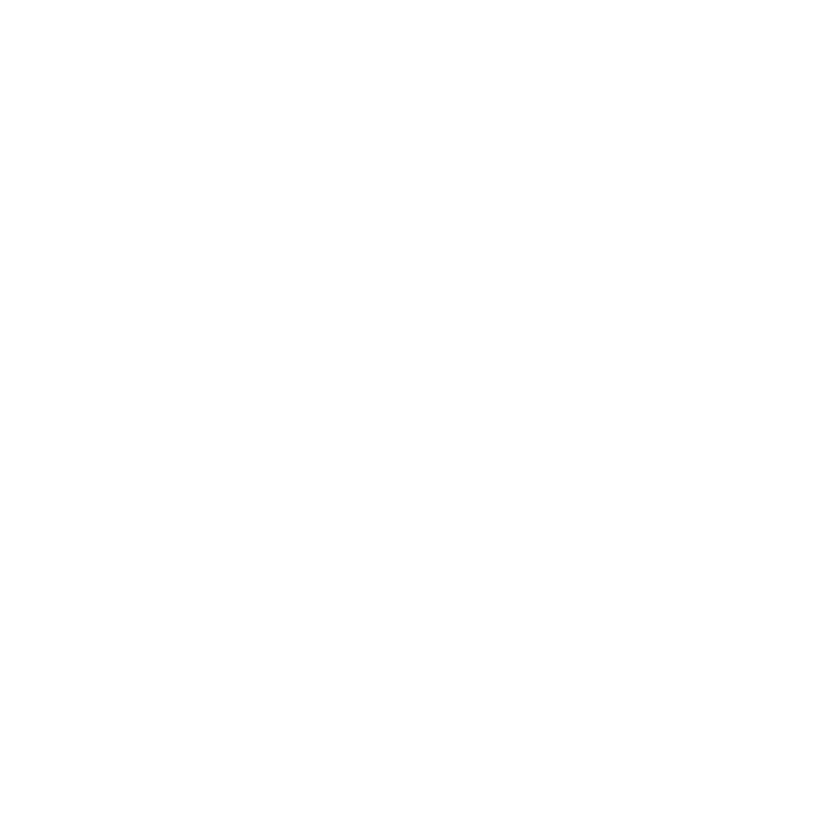

In [10]:
name <- "REGSAR1"
model <- train[8000:nrow(train),] |>
  model(name = ARIMA(box_cox(NetLoad,0.74) ~
                        pdq(0,0,0) + PDQ(0,1,0,period=24)
                        # + Hour  # hour of the day
                        + DayType  # day of the week / holiday
                        + DayType*Hour
                        # + fourier("week",K=3) + Holiday + Holiday*Hour
                        # + fourier("week",K=3)*Hour
                      # + Sun + Sat + Holiday
                       + fourier("year",K=2)  # time of the year
                        + fourier("year",K=2)*Hour  # time of the year
                       + NetLoadLag
                       + NetLoadLag2
                       + NetLoadLag3
                       #+ NetLoadLag24
                       + NetLoadMax24
                       + NetLoadMin24
                       + TempPred6h
                       + TempPred6h*Hour
                       + I(TempPred6h^2)
                       + I(TempPred6h^2)*Hour
                       + I(TempPred6h^3)
                       + I(TempPred6h^3)*Hour
                      #  + TempPred6h*fourier("year",K=3)
                      #  + I(TempPred6h^2)*fourier("year",K=3)
                      #  + I(TempPred6h^3)*fourier("year",K=3)
                      #  + TempMean24
                      #  + TempMean24*Hour
                      #  + I(TempMean24^2)
                      #  + I(TempMean24^2)*Hour
                      # #  + TempMean24*fourier("year",K=3)  # excluded
                      # #  + I(TempMean24^2)*fourier("year",K=3) # excluded
                      # #  + I(TempMean24^3)*fourier("year",K=3) # excluded
                      #  + TempMean1W
                      #  + TempMean1W*Hour
                      #  + I(TempMean1W^2)
                      #  + I(TempMean1W^2)*Hour
                      #  + TempLag
                      #  + TempLag*Hour
                      #  + I(TempLag^2)
                      #  + I(TempLag^2)*Hour
                      # #  + I(TempLag^3) # excluded
                      # #  + I(TempLag^3)*Hour # excluded
                      #  + TempLag2
                      #  + TempLag2*Hour
                      #  + I(TempLag2^2)
                      #  + I(TempLag2^2)*Hour
                      # #  + I(TempLag2^3) # excluded
                      # #  + I(TempLag2^3)*Hour  # excluded
                      #  + TempLag3
                      #  + TempLag3*Hour
                      #  + I(TempLag3^2)
                      #  + I(TempLag3^2)*Hour
                      #  + pmax(TempPred6h,27)
                       + RadPred6h
                       + I(RadPred6h^2)
                      # #  + I(RadPred6h^3) # excluded
                      #  + HumPred6h
         ))
saveRDS(model, file=paste0(name,".rds"))
model
model |> refit(val) |> accuracy()
model |> gg_tsresiduals()

In [ ]:
name <- "REGSAR2"
model <- train |>
  model(name = ARIMA(NetLoad ~ PDQ(0,0,0) + Hour
                       + TempPred6h
                       + RadPred6h
                       + TempPred6h*Hour
                       + I(TempPred6h^2)
                       + DayType
                      #  + HumPred6h
                      #  + fourier("year",K=2)
         ))
saveRDS(model, file=paste0(name,".rds"))
model
model |> refit(val) |> accuracy()
model |> gg_tsresiduals()

### Neural network NNARX

model
<model>
"<NNAR(0,6)>"


.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model,Training,0.2470945,2.817769,1.1251,-0.1419391,0.6421713,0.01470693,0.02435776,0.830009


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”


.model,lb_stat,lb_pvalue
<chr>,<dbl>,<dbl>
model,15392.94,0


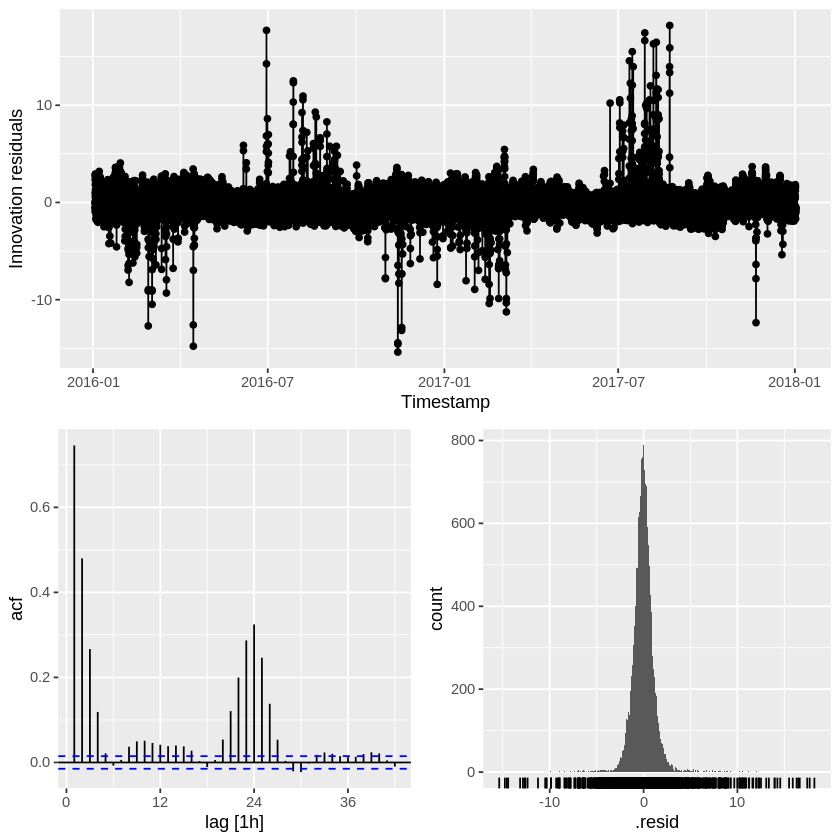

In [8]:
name <- "NNARX"
model <- train |>
  model(model = NNETAR(NetLoad ~ AR(p=0,P=0,period=NULL)
                        + fourier("day",K=1)
                        + fourier("year",K=1)  # time of the year
                        + NetLoadLag
                        # + NetLoadLag2 # excluded
                        + NetLoadLag24
                        + NetLoadMax24
                        # + NetLoadMin24 # excluded
                        + TempPred6h
                        + TempLag
                        + TempLag2
                      ))

saveRDS(model, file=paste0(name,".rds"))
model
model |> refit(val) |> accuracy()
# model |> coef()
model |> gg_tsresiduals()
augment(model) |> features(.innov, ljung_box, lag=10)

## Fit models: y = Solar

SAR
<model>
"<LM w/ ARIMA(0,0,4)(2,1,0)[24] errors>"


.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SAR,Training,0.00303686,63.59393,32.98303,NaN,Inf,0.316793,0.2631003,-0.05122733


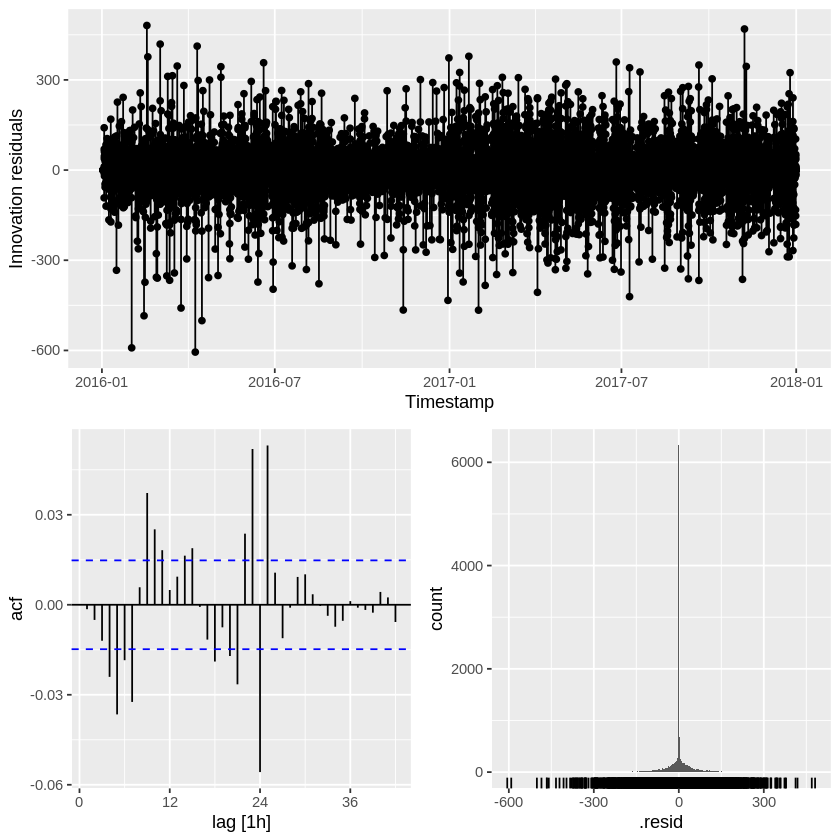

In [ ]:
model <- train |>
  model(SAR = ARIMA(Solar ~ PDQ(period=24) + RadDirPred6h +RadDifPred6h))
saveRDS(model, file="Solar.rds")
model
model |> refit(val) |> accuracy()
model |> gg_tsresiduals()

In [ ]:
cor(train$RadPred6h,train$Solar)

[1] 0.9444346

SolarAR
<model>
"<LM w/ ARIMA(5,1,0)(1,0,0)[24] errors>"


.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SolarAR,Training,0.00908751,69.39532,43.13862,NaN,Inf,0.4143346,0.2871018,-0.09171253


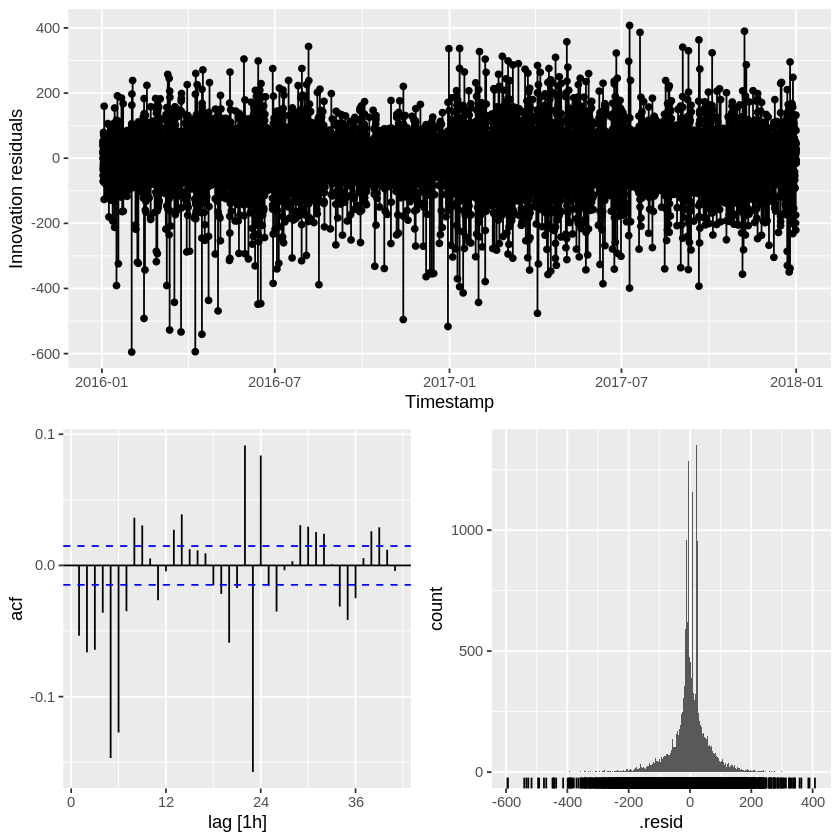

In [ ]:
model <- train |>
  model(SolarAR= ARIMA(Solar ~ RadPred6h + fourier("day",K=2)))
saveRDS(model, file="SolarAR.rds")
model
model |> refit(val) |> accuracy()
model |> gg_tsresiduals()